In [1]:
import camb
pars = camb.CAMBparams()
from scipy.special import jn, jn_zeros
from camb import model, initialpower
from scipy.interpolate import interp1d
from hankel_transform import *
from astropy.cosmology import Planck13 #use Planck15 if you can
import astropy.units as u
#rc('text', usetex=False)

In [2]:
from matplotlib.pyplot import *
%matplotlib inline

In [3]:
cosmo=Planck13.clone()#we want h=1 for some comparisons

In [4]:
#Set up a new set of parameters for CAMB
kmax=55#30
kmin=.8e-3
k_smooth=1
nk=5000
rmin=.055
rmax=110
non_linear=1

pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.27, ombh2=0.022250, omch2=0.119800, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(ns=0.965, r=0,As =2.14e-09)
pars.set_for_lmax(2500, lens_potential_accuracy=0)
zb=[.27]#[0.0]
pars.set_matter_power(redshifts=zb,kmax=kmax);
if non_linear==1:
    pars.NonLinear = model.NonLinear_both
else:
    pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
kh, z, pk =results.get_matter_power_spectrum(minkh=kmin, maxkh=kmax, npoints =nk)

In [5]:
#Setting up the Hankel Transform
#This part is slower. But only needs to be run once. 
#If you only need wgg, set j_nu=[0]. For wg+ (or \Delta\Sigma) use j_nu=[2]
%time HT=hankel_transform(rmin=rmin,rmax=rmax,kmax=kmax,j_nu=[0],n_zeros=28000,kmin=kmin)
#HT=hankel_transform(rmin=1,rmax=rmax,kmax=1,j_nu=[0,2],n_zeros=2800,kmin=1.e-2)#quick test... inaccurate

('j-nu=', 0, ' not enough zeros to cover kmin, increasing by ', 1000, ' to', 29000)
('j-nu=', 0, ' not enough zeros to cover kmin, increasing by ', 1000, ' to', 30000)
('j-nu=', 0, ' not enough zeros to cover kmin, increasing by ', 1000, ' to', 31000)
('j-nu=', 0, ' not enough zeros to cover kmin, increasing by ', 1000, ' to', 32000)
('j-nu=', 0, ' not enough zeros to cover kmin, increasing by ', 1000, ' to', 33000)
('j-nu=', 0, ' not enough zeros to cover kmin, increasing by ', 1000, ' to', 34000)
('j-nu=', 0, ' not enough zeros to cover kmin, increasing by ', 1000, ' to', 35000)
('j-nu=', 0, ' not enough zeros to cover kmin, increasing by ', 1000, ' to', 36000)
('j-nu=', 0, ' not enough zeros to cover kmin, increasing by ', 1000, ' to', 37000)
('j-nu=', 0, ' not enough zeros to cover kmin, increasing by ', 1000, ' to', 38000)
('j-nu=', 0, ' not enough zeros to cover kmin, increasing by ', 1000, ' to', 39000)
('j-nu=', 0, ' not enough zeros to cover kmin, increasing by ', 1000, ' to',

In [6]:
pk_taper=HT.taper(k=kh,pk=pk[0],large_k_lower=5,large_k_upper=kmax,low_k_lower=kmin,
                     low_k_upper=kmin*2)
#need atleast k=10 and k=1.e-3 to get decent wgg for 1-100 Mpc/h range.

# g-g Lensing covariance

In [7]:
h = 0.704

In [8]:
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency

# replaced with DarkSky values
pars.set_cosmology(H0=70.4, ombh2=0.0231566, omch2=0.12293, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(ns=0.967, r=0,As =2.18e-09)
pars.set_for_lmax(2500, lens_potential_accuracy=0)
zb=[0.0]#[0.0]#
pars.set_matter_power(redshifts=zb,kmax=kmax);
if non_linear==1:
    pars.NonLinear = model.NonLinear_both
else:
    pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
kh, z, pk =results.get_matter_power_spectrum(minkh=kmin, maxkh=kmax, npoints =nk)

In [9]:
HT=hankel_transform(rmin=rmin,rmax=rmax,kmax=kmax,j_nu=[2],n_zeros=60000,kmin=kmin)

('changed kmax to', 93.37495094255787, ' to cover rmin')
('j-nu=', 2, ' not enough zeros to cover kmin, increasing by ', 1000, ' to', 61000)
('j-nu=', 2, ' not enough zeros to cover kmin, increasing by ', 1000, ' to', 62000)
('j-nu=', 2, ' not enough zeros to cover kmin, increasing by ', 1000, ' to', 63000)
('j-nu=', 2, ' not enough zeros to cover kmin, increasing by ', 1000, ' to', 64000)
('j-nu=', 2, ' not enough zeros to cover kmin, increasing by ', 1000, ' to', 65000)
('j-nu=', 2, ' not enough zeros to cover kmin, increasing by ', 1000, ' to', 66000)
('j-nu=', 2, ' not enough zeros to cover kmin, increasing by ', 1000, ' to', 67000)
('j-nu=', 2, ' not enough zeros to cover kmin, increasing by ', 1000, ' to', 68000)
('j-nu=', 2, ' not enough zeros to cover kmin, increasing by ', 1000, ' to', 69000)
('j-nu=', 2, ' not enough zeros to cover kmin, increasing by ', 1000, ' to', 70000)
('j-nu=', 2, ' not enough zeros to cover kmin, increasing by ', 1000, ' to', 71000)
('j-nu=', 2, ' not 

('j-nu=', 2, ' not enough zeros to cover kmin, increasing by ', 1000, ' to', 158000)
('j-nu=', 2, ' not enough zeros to cover kmin, increasing by ', 1000, ' to', 159000)
('j-nu=', 2, ' not enough zeros to cover kmin, increasing by ', 1000, ' to', 160000)
('j-nu=', 2, ' not enough zeros to cover kmin, increasing by ', 1000, ' to', 161000)
('j-nu=', 2, ' not enough zeros to cover kmin, increasing by ', 1000, ' to', 162000)
('j-nu=', 2, ' not enough zeros to cover kmin, increasing by ', 1000, ' to', 163000)
('j-nu=', 2, ' not enough zeros to cover kmin, increasing by ', 1000, ' to', 164000)
('j-nu=', 2, ' not enough zeros to cover kmin, increasing by ', 1000, ' to', 165000)
('j-nu=', 2, ' not enough zeros to cover kmin, increasing by ', 1000, ' to', 166000)
('j-nu=', 2, ' not enough zeros to cover kmin, increasing by ', 1000, ' to', 167000)
('j-nu=', 2, ' not enough zeros to cover kmin, increasing by ', 1000, ' to', 168000)
('j-nu=', 2, ' not enough zeros to cover kmin, increasing by ', 1

In [10]:
sigma_crit=4.7e3

In [11]:
sigma_e=.36
sigma_gamma=sigma_e/1.7
n_s=8
shape_noise=sigma_crit**2*sigma_gamma**2/n_s#*cosmo.H_z(z=0.27)/cosmo.c

In [12]:
rho=0.04180594698596614 #units of Msun/pc^2/mpc, using h=1

In [13]:
Dchi2=900 #integral over product of window functions
p_kappa_kappa=pk[0]*(rho)**2*Dchi2

In [14]:
n_g=5e-4#3.e-4
g_shot_noise=1./n_g
b_g=1.838
p_g=b_g**2*pk[0]
#p_gk=b_g*pk[0]*rho

In [15]:
r_bins=np.logspace(-1,1.6,19)#*h

In [16]:
area=10000
area_comoving=area*(np.pi/180)**2*cosmo.comoving_distance(z=.27)**2
L_W=500
#vol=(area_comoving*L_W).value
vol=(1000)**3#vol.value # don't actually need the h

In [17]:
(shape_noise*g_shot_noise)/(vol*h**4)

1.0082128926958325

In [18]:
taper_kw=dict({'large_k_lower':10,'large_k_upper':kmax,'low_k_lower':kmin,'low_k_upper':kmin*1.2})

In [19]:
r,cov_ggkk_shape=HT.projected_covariance(k_pk=kh,pk1=p_g+g_shot_noise,pk2=np.zeros_like(p_kappa_kappa)+shape_noise,j_nu=2,taper=True,**taper_kw)
r,cov_ggkk=HT.projected_covariance(k_pk=kh,pk1=p_g+g_shot_noise,pk2=p_kappa_kappa,j_nu=2,taper=True,**taper_kw)

r_re,cov_ggkk_shape_re=HT.bin_cov(r=r/h,cov=cov_ggkk_shape,r_bins=r_bins)

r_re,cov_ggkk_re=HT.bin_cov(r=r/h,cov=cov_ggkk,r_bins=r_bins)
corr=HT.corr_matrix(cov=cov_ggkk_shape_re)

cov_ggkk_re/=vol # Don't forget!
cov_ggkk_shape_re/=vol

In [20]:
print np.sqrt(np.diag(cov_ggkk_shape_re))

[1.0263207  0.98494148 0.90722623 0.69274081 0.57677226 0.45103709
 0.32990732 0.23736836 0.17742547 0.13398334 0.10010477 0.07595037
 0.05802125 0.04515957 0.03575584 0.02910926 0.02429026 0.02063339]


In [21]:
cov_ggkk_shape_re/=(h**4) # convert to the units I'm in
cov_ggkk_re/=(h**4)

In [22]:
print r_re*np.sqrt(np.diag(cov_ggkk_shape_re))

[0.24454568 0.32728928 0.42041809 0.44769373 0.51982725 0.56690642
 0.57827647 0.58024425 0.60485102 0.63698278 0.66370657 0.70225634
 0.74816487 0.81209059 0.89669774 1.01806322 1.18473193 1.40346945]


In [23]:
sim_covmat = np.load('/home/users/swmclau2/Git/pearce/bin/covmat/wp_ds_sim_covmat.npy')

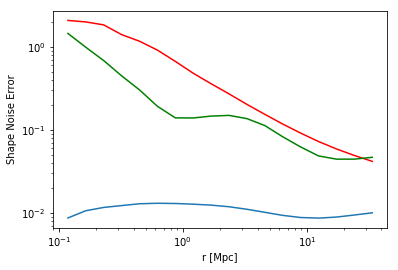

In [24]:
plot(r_re, np.sqrt(np.diag(cov_ggkk_re)) )
plot(r_re, np.sqrt(np.diag(cov_ggkk_shape_re)), color ='r' )
plot(r_re, np.sqrt(np.diag(sim_covmat[18:][:,18:])), color = 'g')
ylabel('Shape Noise Error')
xlabel('r [Mpc]')
loglog();

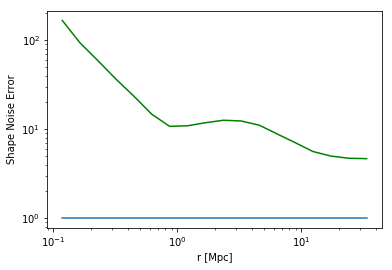

In [25]:
plot(r_re, np.ones_like(np.sqrt(np.diag(cov_ggkk_re)) ) )
#plot(r_re, np.sqrt(np.diag(cov_ggkk_shape_re)), color ='r' )
plot(r_re, np.sqrt(np.diag(sim_covmat[18:][:,18:]))/np.sqrt(np.diag(cov_ggkk_re)), color = 'g')
ylabel('Shape Noise Error')
xlabel('r [Mpc]')
loglog();

In [26]:
np.sqrt(np.diag(sim_covmat[18:][:,18:]))/np.sqrt(np.diag(cov_ggkk_re))

array([166.52934716,  92.92153024,  58.61955582,  36.47454283,
        23.48490284,  14.70683903,  10.73897322,  10.91144173,
        11.80390669,  12.58673206,  12.3450891 ,  11.08093174,
         8.83563547,   7.0649328 ,   5.60719413,   4.98100865,
         4.70841745,   4.65882713])

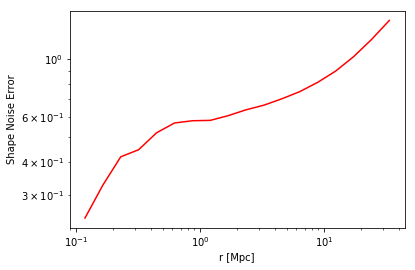

In [27]:
#plot(r_re, np.sqrt(np.diag(cov_ggkk_re)) )
plot(r_re, r_re*np.sqrt(np.diag(cov_ggkk_shape_re)), color ='r' )

ylabel('Shape Noise Error')
xlabel('r [Mpc]')
loglog();

In [28]:
print np.sqrt(np.diag(corr))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [29]:
np.sqrt(np.diag(cov_ggkk_shape_re))

array([2.07079815, 1.98730768, 1.8305023 , 1.39773697, 1.16374826,
       0.91005352, 0.66565107, 0.47893603, 0.35798979, 0.27033699,
       0.2019805 , 0.15324438, 0.11706896, 0.09111806, 0.07214424,
       0.0587335 , 0.04901023, 0.0416318 ])

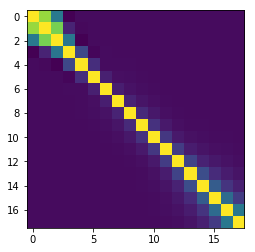

In [30]:
imshow(corr)

In [31]:
np.save('shape_noise.npy', cov_ggkk_shape_re)

In [32]:
np.min(r_re), np.min(r)

(0.11809247432396976, 0.055)

In [33]:
from matplotlib.colors import LogNorm

(0.055, 110)

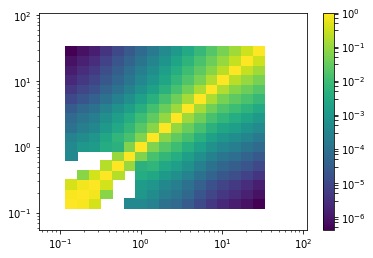

In [34]:
pcolor(r_re,r_re,corr,norm=LogNorm())
colorbar()
xscale('log')
yscale('log')
xlim(HT.rmin,HT.rmax)
ylim(HT.rmin,HT.rmax)

In [35]:
r,cov_gkgk=HT.projected_covariance(k_pk=kh,pk1=p_gk,pk2=p_gk,
                               kmax=100,rmin=.8,j_nu=2,rmax=110,n_zeros=3500)#return_Jrr=True,Jrr=Jrr
cov_gkgk*=Dchi2
r_re,cov_gkgk_re=HT.bin_cov(r=r,cov=cov_gkgk,r_bins=r_bins)
corr=HT.corr_matrix(cov=cov_gkgk_re)

NameError: name 'p_gk' is not defined

In [ ]:
cov_final=(cov_ggkk_re+cov_gkgk_re)/vol
corr=HT.corr_matrix(cov=cov_final)
errors=HT.diagonal_err(cov=cov_final)

In [ ]:
pcolor(r_re,r_re,corr,norm=LogNorm())
colorbar()
xscale('log')
yscale('log')
xlim(HT.rmin,HT.rmax)
ylim(HT.rmin,HT.rmax)

In [ ]:
plot(r_re,r_re*errors,label='new')
#plot(error_qpm['rp'],error_qpm['rp']*error_qpm['DS_err_gR'])
xscale('log')
yscale('log')
legend()
xlim(1,100)